# Twitter Sentiment Analysis 

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [101]:
# dataset 
data = pd.read_csv(r"C:/Users/asus/OneDrive/Desktop/Dataset/Twitter sentiment analysis.csv", encoding='windows-1252')

In [53]:
# put name for each column
column_name=['ID','keyword','sentiment','tweet_content']
data.columns=column_name

In [54]:
data.head()

,ID,keyword,sentiment,tweet_content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


# Domain Analysis

In [55]:
data.tail()

,ID,keyword,sentiment,tweet_content
75677,4891,GrandTheftAuto(GTA),Irrelevant,?? Toronto is the arts and culture capital of ...
75678,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
75679,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
75680,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.
75681,6960,johnson&johnson,Neutral,Johnson & Johnson to stop selling talc baby po...


In [56]:
data.describe(include=object)

,keyword,sentiment,tweet_content
count,75682,75682,74996
unique,32,4,69973
top,TomClancysRainbowSix,Negative,"At the same time, despite the fact that there ..."
freq,2435,22808,172


In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75682 entries, 0 to 75681
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             75682 non-null  int64 
 1   keyword        75682 non-null  object
 2   sentiment      75682 non-null  object
 3   tweet_content  74996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [58]:
data.shape

(75682, 4)

In [59]:
data['Length'] = data['tweet_content'].astype(str).apply(len)
data['Length']

0         53
1         51
2         50
3         51
4         57
        ... 
75677    281
75678    248
75679    120
75680     49
75681    116
Name: Length, Length: 75682, dtype: int64

In [60]:
## The mails are categorised into 2 classes. 
# Let's see the count of each class
data.groupby('sentiment').count()

,ID,keyword,tweet_content,Length
sentiment,,,,
Irrelevant,13162,13162,13047,13162
Negative,22808,22808,22624,22808
Neutral,18603,18603,18393,18603
Positive,21109,21109,20932,21109


# Exploratory data analysis

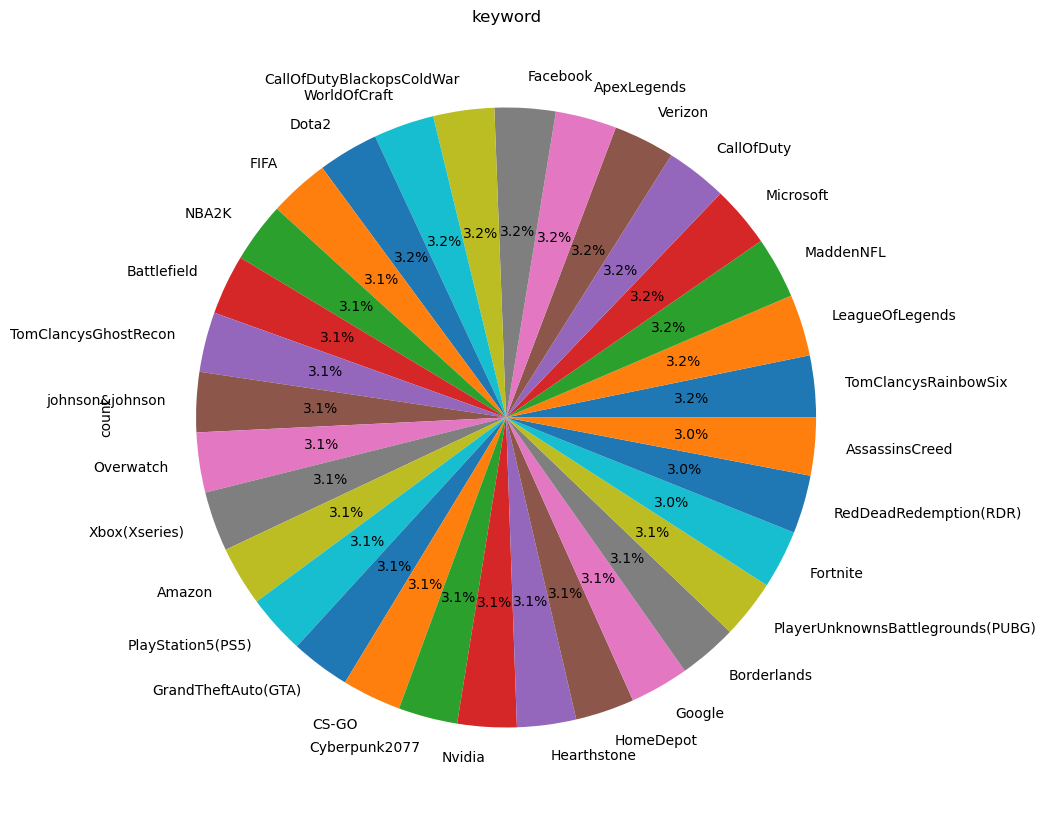

In [61]:
keyword_content=data['keyword'].value_counts()
keyword_content.plot(kind='pie', autopct='%1.1f%%', figsize=(10, 12))
plt.title('keyword')
plt.show()


we can see from the above plot the entities of the tweets are mostly equals

<Axes: xlabel='sentiment'>

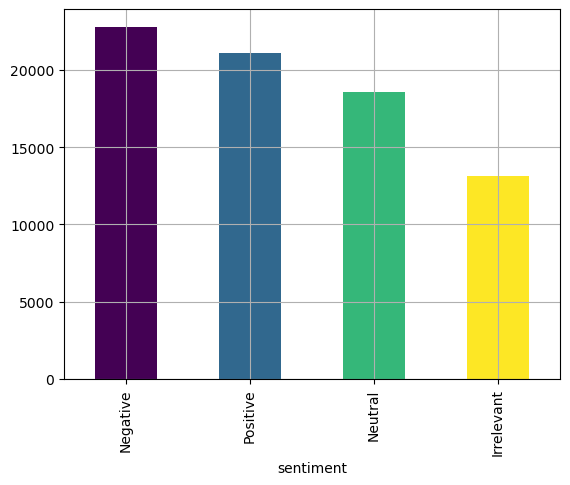

In [62]:
sentiment=data['sentiment'].value_counts()
color=plt.get_cmap('viridis')
colors = [color(i) for i in np.linspace(0, 1, len(sentiment))]
sentiment.plot(kind='bar',color=colors,grid=True)

at the above figure we can see the number of the negative reactions are above to 20000
the min number of the reactions are the number of the irrelevant reactions are less tan 15000

# Text Preprocessing 

In [63]:
# Remove unwanted columns
data.drop(['ID', 'keyword'], axis=1, inplace=True)

In [64]:
# check missing  values
data.isnull().sum()

sentiment          0
tweet_content    686
Length             0
dtype: int64

In [65]:
data.dropna(inplace=True)

In [66]:
# check duplicates
data.duplicated().sum()

4745

In [67]:
 # Remove duplicates
data.drop_duplicates(inplace=True)

In [68]:
data['sentiment'].unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

In [69]:
# convert categorical data into numerical
label_map = {'Positive': 3, 'Neutral': 2,'Negative':1,'Irrelevant':0}
# Apply the mapping
data['sentiment'] = data['sentiment'].map(label_map)

In [70]:
data.head()

,sentiment,tweet_content,Length
0,3,im getting on borderlands and i will murder yo...,53
1,3,I am coming to the borders and I will kill you...,51
2,3,im getting on borderlands and i will kill you ...,50
3,3,im coming on borderlands and i will murder you...,51
4,3,im getting on borderlands 2 and i will murder ...,57


In [71]:
# the default list of punctuations
import string
string.punctuation
# Let's remove the punctuation

def remove_punct(text):
    text = "".join([char for char in text if char not in string.punctuation])
    return text

data['clean_content'] = data['tweet_content'].apply(lambda x: remove_punct(x))

data.head()

,sentiment,tweet_content,Length,clean_content
0,3,im getting on borderlands and i will murder yo...,53,im getting on borderlands and i will murder yo...
1,3,I am coming to the borders and I will kill you...,51,I am coming to the borders and I will kill you...
2,3,im getting on borderlands and i will kill you ...,50,im getting on borderlands and i will kill you all
3,3,im coming on borderlands and i will murder you...,51,im coming on borderlands and i will murder you...
4,3,im getting on borderlands 2 and i will murder ...,57,im getting on borderlands 2 and i will murder ...


### Remove Stopwords

In [99]:
from collections import Counter

# Flatten all words from the cleaned_text column into a single list
all_words = ' '.join(data['clean_content'].dropna()).split()

# Now filter out stopwords
filtered_words = [word for word in all_words if word not in stop_words]

# Count frequency
filtered_freq = Counter(filtered_words)

# Show top 20 most common words
print(filtered_freq.most_common(20))

[('I', 24986), ('game', 7326), ('The', 5109), ('like', 4488), ('2', 4008), ('get', 3533), ('Im', 3016), ('play', 2919), ('really', 2893), ('good', 2854), ('This', 2847), ('one', 2749), ('Johnson', 2703), ('3', 2572), ('love', 2516), ('new', 2439), ('’', 2412), ('shit', 2358), ('people', 2348), ('time', 2336)]


### Visualize with WordCloud

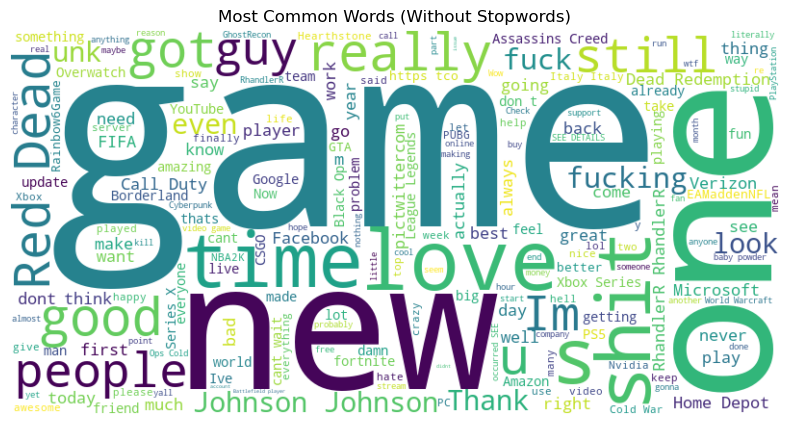

In [100]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(filtered_words))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words (Without Stopwords)")
plt.show()


In [72]:
# Splitting x and y

x = data['clean_content'].values
y = data['sentiment'].values


In [73]:
# Datatype for y is object. lets convert it into int
y = y.astype('int')
y

array([3, 3, 3, ..., 2, 0, 0])

# BOW vectorizer

In [74]:
# Bag of word
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()  
X = vectorizer.fit_transform(x)

In [75]:
X.shape

(70251, 41065)

In [76]:
## Creating training and testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=6)

In [77]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, data['sentiment'])

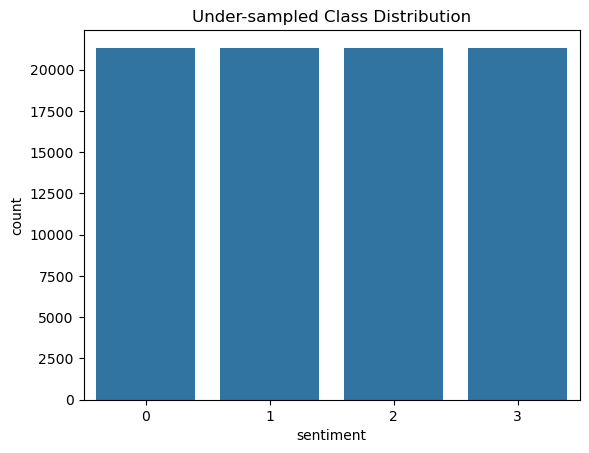

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=y_resampled)
plt.title("Under-sampled Class Distribution")
plt.show()

In [79]:
# Model creation
from sklearn.naive_bayes import MultinomialNB

## model object creation
mb=MultinomialNB(alpha=0.01) 

## fitting the model
mb.fit(X_resampled, y_resampled)

## getting the prediction
y_hat=mb.predict(X_test) 

In [80]:
## Evaluating the model
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84      3046
           1       0.87      0.88      0.88      5227
           2       0.93      0.83      0.88      4373
           3       0.85      0.88      0.87      4917

    accuracy                           0.87     17563
   macro avg       0.87      0.87      0.87     17563
weighted avg       0.87      0.87      0.87     17563



# ************ model gives 87% accurasy*******************

# TF-IDF vectorizer

In [81]:
data.head()

,sentiment,tweet_content,Length,clean_content
0,3,im getting on borderlands and i will murder yo...,53,im getting on borderlands and i will murder yo...
1,3,I am coming to the borders and I will kill you...,51,I am coming to the borders and I will kill you...
2,3,im getting on borderlands and i will kill you ...,50,im getting on borderlands and i will kill you all
3,3,im coming on borderlands and i will murder you...,51,im coming on borderlands and i will murder you...
4,3,im getting on borderlands 2 and i will murder ...,57,im getting on borderlands 2 and i will murder ...


In [82]:
# Splitting x and y

X = data['clean_content'].values
Y = data['sentiment'].values


In [83]:
# Datatype for y is object. lets convert it into int
Y = y.astype('int')
y

array([3, 3, 3, ..., 2, 0, 0])

In [84]:
# text preprocessing and feature vectorizer
# To extract features from a document of words, we import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

tf=TfidfVectorizer(max_features=5000) ## object creation
X=tf.fit_transform(X) ## fitting and transforming the data into vectors

In [87]:
## number of features created
len(tf.get_feature_names_out())

5000

In [88]:
## Creating training and testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=6)

In [89]:
X = X.toarray()

In [90]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, data['sentiment'])

In [91]:
# Model creation
from sklearn.naive_bayes import MultinomialNB

## model object creation
mb=MultinomialNB(alpha=0.01) 

## fitting the model
mb.fit(X_resampled, y_resampled)

## getting the prediction
y_hat=mb.predict(X_test) 

In [92]:
## Evaluating the model
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.60      0.68      0.64      3046
           1       0.75      0.75      0.75      5227
           2       0.72      0.60      0.66      4373
           3       0.70      0.74      0.72      4917

    accuracy                           0.70     17563
   macro avg       0.69      0.69      0.69     17563
weighted avg       0.70      0.70      0.70     17563



# ****************** model gives 70 % Accurasy *************